<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations


In [14]:
print(boston_df.info())
print(boston_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE_Group   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.0 KB
None
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000 

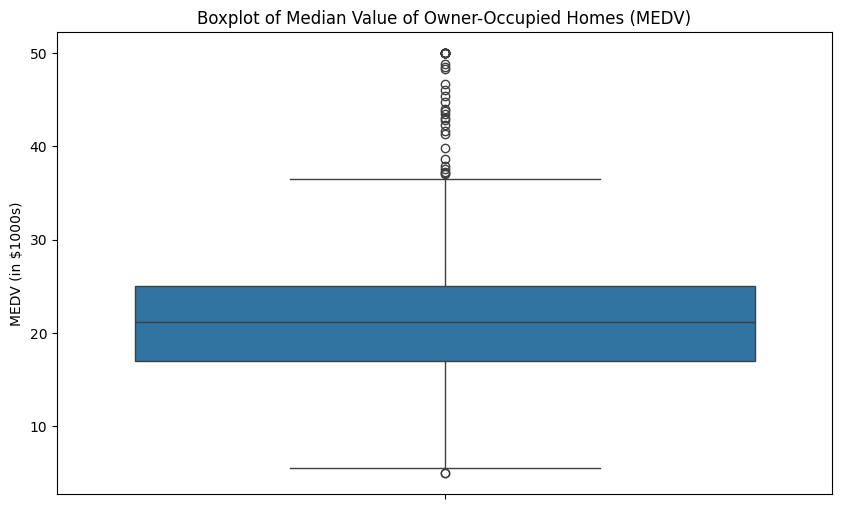

In [9]:
#For the "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('MEDV (in $1000s)')
pyplot.show()

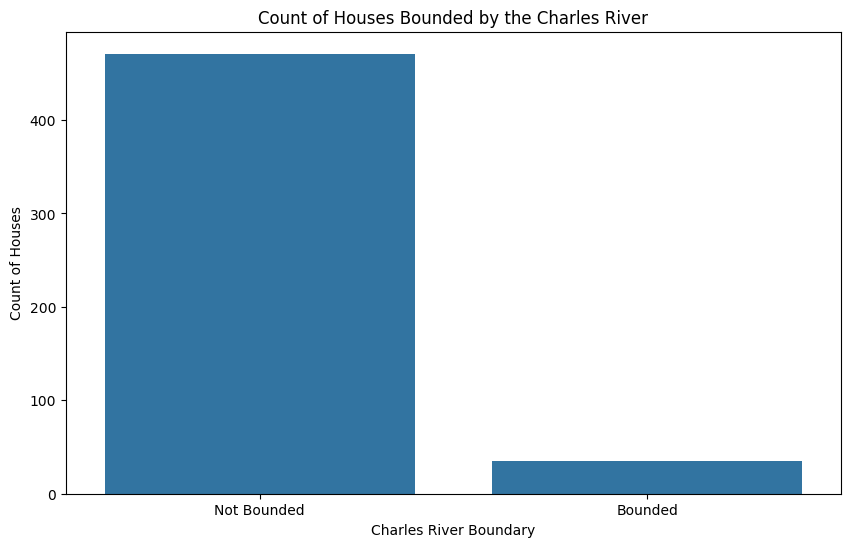

In [8]:
#Provide a  bar plot for the Charles river variable
pyplot.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Count of Houses Bounded by the Charles River')
pyplot.xticks([0, 1], ['Not Bounded', 'Bounded'])
pyplot.xlabel('Charles River Boundary')
pyplot.ylabel('Count of Houses')
pyplot.show()


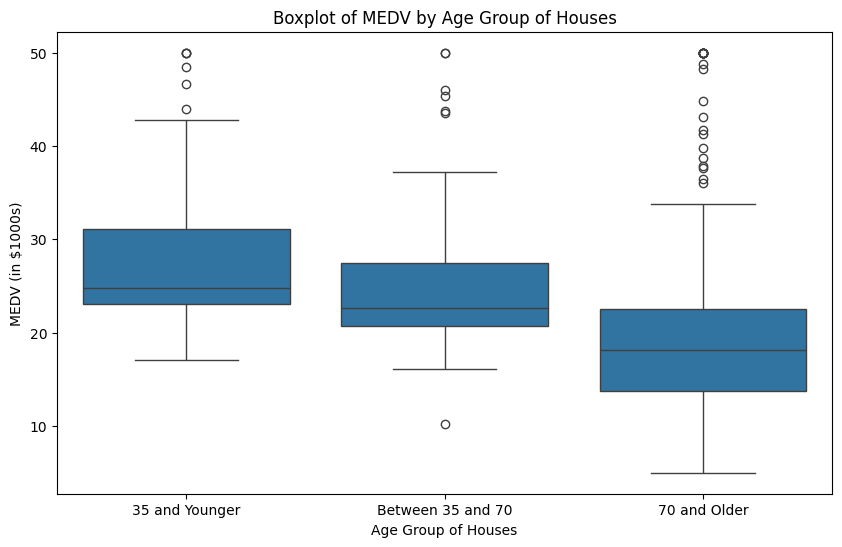

In [11]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', 'Between 35 and 70', '70 and Older'])

pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by Age Group of Houses')
pyplot.xlabel('Age Group of Houses')
pyplot.ylabel('MEDV (in $1000s)')
pyplot.show()


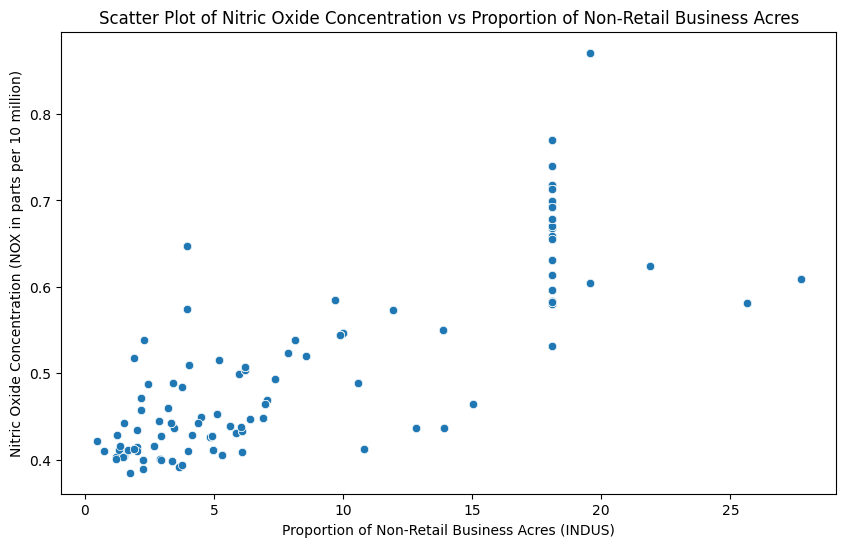

In [12]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentration vs Proportion of Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX in parts per 10 million)')
pyplot.show()


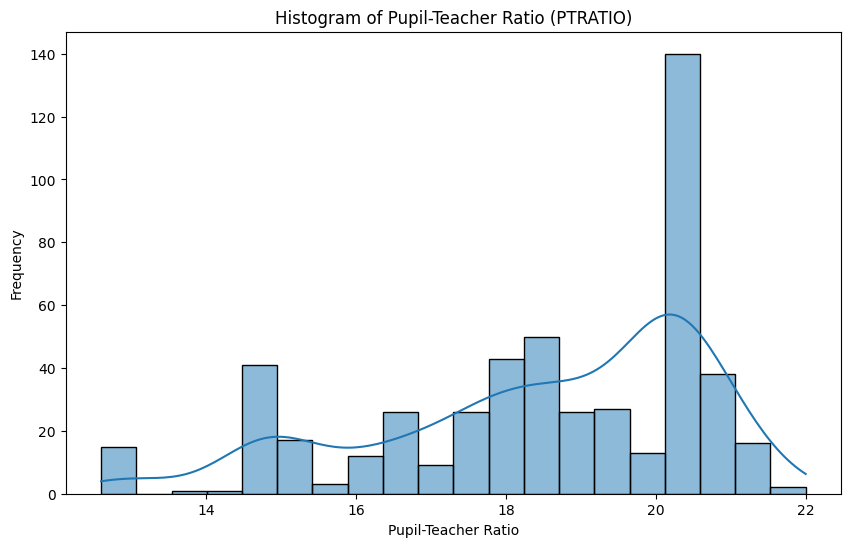

In [13]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()


# Task 3: Use the appropriate tests to answer the questions provided.

## Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

### Null Hypothesis (H0): There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded.
### Alternative Hypothesis (H1): There is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded.

In [15]:
group_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(group_bounded, group_not_bounded)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


### Reject Null Hypothesis H0: There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded.¶

## Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

### Null Hypothesis (H0): There is no significant difference in the median values of houses across different age groups.
### Alternative Hypothesis (H1): At least one age group has a different median value.

In [17]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', 'Between 35 and 70', '70 and Older'])

model = ols('MEDV ~ C(AGE_Group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


### Reject H0. There is a significant difference in median values of houses based on the age of the units built.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

### Null Hypothesis (H0): There is no correlation between NOX and INDUS (correlation coefficient = 0).
### Hypothesis (H1): There is a correlation between NOX and INDUS (correlation coefficient ≠ 0).

In [20]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation Coefficient: {correlation}, P-value: {p_value}")


Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98


### Reject Null Hypothesis (H0): There is no correlation between NOX and INDUS (correlation coefficient = 0).

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression Analysis)

### Null Hypothesis (H0): An additional unit of weighted distance to employment centres does not impact the median value of homes (slope = 0).
### Alternative Hypothesis (H1): An additional unit of weighted distance to employment centres does impact the median value of homes (slope ≠ 0).

In [22]:
model = ols('MEDV ~ DIS', data=boston_df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        11:27:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

### Reject Null Hypothesis (H0): An additional unit of weighted distance to employment centres does not impact the median value of homes (slope = 0).

But there is still a slope with the DIS=1.0916. Because of the low R-Squared there may be other factors making the Regression Line Rise as depicted in the graph below.

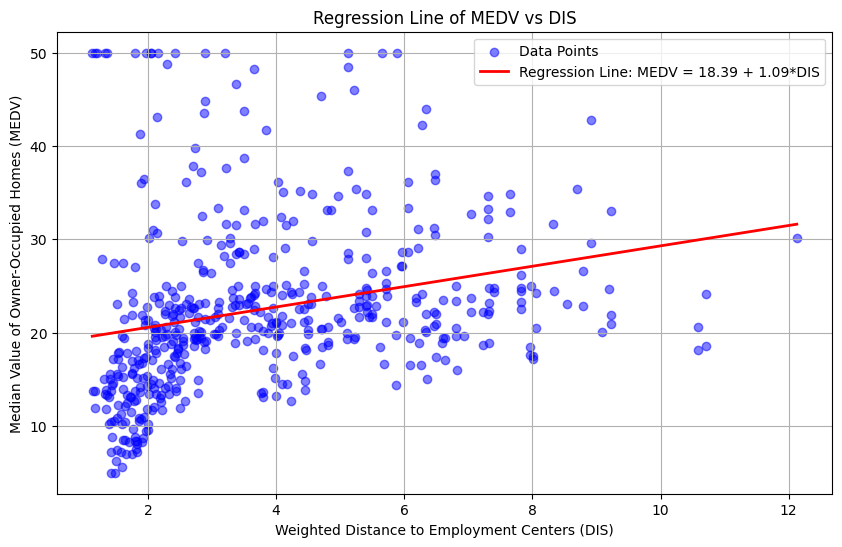

In [26]:
import matplotlib.pyplot as plt
import numpy as np

DIS = boston_df['DIS']
MEDV = boston_df['MEDV']

plt.figure(figsize=(10, 6))
plt.scatter(DIS, MEDV, color='blue', alpha=0.5, label='Data Points')


intercept = 18.3901  
slope = 1.0916       

x_vals = np.linspace(DIS.min(), DIS.max(), 100)  
y_vals = intercept + slope * x_vals  

plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regression Line: MEDV = {:.2f} + {:.2f}*DIS'.format(intercept, slope))

plt.title('Regression Line of MEDV vs DIS')
plt.xlabel('Weighted Distance to Employment Centers (DIS)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.legend()
plt.grid(True)
plt.show()